In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
store_Locations_dataset = pd.read_excel("Sample Dataset (1).xlsx", sheet_name="Store Locations Sheet")
dataset = pd.read_excel("Sample Dataset (1).xlsx")
dataset = dataset.replace("", float('nan')).fillna(0.0)
dataset['Sales Channel'] = dataset['Sales Channel'].replace("On line", "Online")
dataset['Sales Channel'] = dataset['Sales Channel'].replace("In Store", "In-Store")
dataset_version_1 = dataset
dataset_version_1["Total Price"] = dataset_version_1["Order Quantity"]*dataset_version_1["Unit Price"]
list_of_max_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].max()].index)
for i in list_of_max_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
list_of_min_Outlier_Indexes = list(dataset_version_1[dataset_version_1["Total Price"]==dataset_version_1["Total Price"].min()].index)
for i in list_of_min_Outlier_Indexes:
    dataset_version_1.drop(i, inplace=True)
dataset_version_1.loc[dataset_version_1["Order Quantity"] == dataset_version_1["Order Quantity"].min(),"Order Quantity"] = 4
dataset_version_1

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,SalesTeam Code,Customer Code,Store Code,Product Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5.0,0.075,1963.1,1001.181,9815.5
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3.0,0.075,3939.6,3348.660,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1.0,0.050,1775.5,781.220,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8.0,0.075,2324.9,1464.687,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8.0,0.100,1822.4,1476.144,14579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,SO - 0007581,Distributor,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-10,2020-11-14,USD,24,24,229,31,1.0,0.100,998.3,628.929,998.3
7478,SO - 0007582,In-Store,WARE-UHY1004,2020-06-18,2020-10-31,2020-11-05,2020-11-08,USD,7,1,238,26,3.0,0.100,3932.9,2831.688,11798.7
7479,SO - 0007583,In-Store,WARE-XYS1001,2020-06-18,2020-10-31,2020-11-10,2020-11-16,USD,4,24,58,5,2.0,0.150,3698.4,3106.656,7396.8
7480,SO - 0007584,In-Store,WARE-NMK1003,2020-06-18,2020-10-31,2020-11-08,2020-11-11,USD,10,42,113,24,5.0,0.200,1788.9,966.006,8944.5


In [33]:
loc_en_dataset = pd.merge(dataset_version_1, store_Locations_dataset, left_on='Store Code', right_on='_StoreID', how='inner')
loc_en_dataset

dataset = 'Sample Dataset (1).xlsx'
sheet = pd.read_excel(dataset, sheet_name='Customers Sheet')
sheet["Customer Names"] = sheet["Customer Names"].replace(" ", "Anonymous")
loc_en_dataset1 = pd.merge(loc_en_dataset, sheet, left_on='Customer Code', right_on='_CustomerID', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Products Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset2 = pd.merge(loc_en_dataset1, sheet, left_on='Product Code', right_on='ID', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Regions Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset3 = pd.merge(loc_en_dataset2, sheet, left_on='StateCode', right_on='StateCode', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Sales Team Demographic')
loc_en_dataset4 = pd.merge(loc_en_dataset3, sheet, left_on='SalesTeam Code', right_on='_SalesTeamID', how='inner')

sheet = pd.read_excel(dataset, sheet_name='Sales Team Sheet')
sheet = sheet.dropna(axis=1)
loc_en_dataset5 = pd.merge(loc_en_dataset4, sheet, left_on='SalesTeam Code', right_on='_SalesTeamID', how='inner')

loc_en_dataset6 = loc_en_dataset5.drop(columns=['WarehouseCode', 'CurrencyCode',
       'SalesTeam Code', 'Customer Code', 'Product Code', 'County', 'Type', 'Latitude', 'Longitude', 'AreaCode', 'Water Area',
       'Time Zone', '_CustomerID', 'ID', '_SalesTeamID_x', 'City Name', 'StateCode', '_StoreID', 'Land Area', 'State_y', 'Sales Team_x', '_SalesTeamID_y', 'Region_y', 'Sales Team_y', 'Region'], inplace=False)

loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Store Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,229,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,238,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,58,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,113,5.0,0.200,1788.9,966.006,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,South


In [34]:
d = loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[0]

C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\1425942963.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[0]


In [35]:
a = list(loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[1])

C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\708217962.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = list(loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[1])


In [36]:
b = loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[2]

C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\136117491.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[2]


In [37]:
c = loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[3]

C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\3184594363.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c = loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].unique()[3]


In [38]:
all_lists = [a, b, c, d]

from collections import Counter

flattened_list = [city for city_list in all_lists for city in city_list]

city_count = Counter(flattened_list)

duplicate_cities = {city: count for city, count in city_count.items() if count > 1}

if duplicate_cities:
    print("These cities appear more than once:", duplicate_cities)
else:
    print("Each city appears only once across all lists.")


Each city appears only once across all lists.


In [43]:
loc_en_dataset6[["State_x", "Region_x"]].groupby("Region_x")["State_x"].count()

Region_x
Midwest      1551
Northeast     895
South        2423
West         2610
Name: State_x, dtype: int64

Here, we can observe that the no. of orders from the north east region is lesser in comparison to other regions. We will now try to understand it by plotting out the number of Stores present in the North-Eastern Region.

In [93]:
loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()

Region_x
Midwest      [196, 213, 280, 152, 193, 282, 218, 173, 238, ...
Northeast    [259, 107, 111, 261, 110, 103, 294, 105, 109, ...
South        [285, 299, 317, 138, 354, 320, 349, 134, 229, ...
West         [6, 17, 291, 21, 20, 97, 362, 84, 256, 360, 90...
Name: Store Code, dtype: object

In [91]:
print("No. of stores in Midwest = ", (len(list(loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()[0]))))
print("No. of stores in Northeast = ", (len(list(loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()[1]))))
print("No. of stores in South = ", (len(list(loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()[2]))))
print("No. of stores in West = ", (len(list(loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()[3]))))

No. of stores in Midwest =  78
No. of stores in Northeast =  46
No. of stores in South =  116
No. of stores in West =  127


C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\3322847696.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("No. of stores in Midwest = ", (len(list(loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()[0]))))
C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\3322847696.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("No. of stores in Northeast = ", (len(list(loc_en_dataset6[["Region_x", "Store Code"]].groupby("Region_x")["Store Code"].unique()[1]))))
C:\Users\zenda\AppData\Local\Temp\ipykernel_26124\3322847696.py:3: FutureWarning: Series.__getitem__ treating keys

States in Northeast with highest no of stores:

In [65]:
temp_df = loc_en_dataset6[["State_x", "Region_x", "Store Code", "Population"]]
temp_df

,State_x,Region_x,Store Code,Population
0,New York,Northeast,259,213776
1,Kansas,Midwest,196,186515
2,Michigan,Midwest,213,117070
3,Connecticut,Northeast,107,130322
4,Connecticut,Northeast,111,108802
...,...,...,...,...
7474,North Carolina,South,229,159769
7475,North Dakota,Midwest,238,118523
7476,California,West,58,158351
7477,District of Columbia,South,113,672228


In [107]:
northeast_stores = temp_df[temp_df["Region_x"] == 'Northeast']
northeast_unique_stores = northeast_stores.drop_duplicates(subset="Store Code")
stores_per_state = northeast_unique_stores.groupby("State_x")["Store Code"].nunique()
print(stores_per_state)

State_x
Connecticut      10
Massachusetts     5
New Hampshire     1
New Jersey        6
New York         20
Pennsylvania      3
Rhode Island      1
Name: Store Code, dtype: int64


Population Metrics of Northeast Region:

In [78]:
a = temp_df[temp_df["Region_x"]=='Northeast'][["State_x", "Population"]]
a.groupby("State_x")[["Population"]].median()

,Population
State_x,
Connecticut,128874.0
Massachusetts,154341.0
New Hampshire,110229.0
New Jersey,147754.0
New York,278419.5
Pennsylvania,304391.0
Rhode Island,179207.0


In [67]:
x = temp_df[temp_df["Region_x"]=='Northeast'][["State_x"]].drop_duplicates().values.tolist()
x

[['New York'],
 ['Connecticut'],
 ['Pennsylvania'],
 ['Massachusetts'],
 ['New Hampshire'],
 ['New Jersey'],
 ['Rhode Island']]

The above states exist in the North East region of the country. We will now focus on extracting no. of stores and population present in these states to better understand the reason for lesser sales in this region.

In [79]:
northeast_stores = temp_df[temp_df["Region_x"] == 'Northeast']
num_stores_northeast = northeast_stores["Store Code"].nunique()
print(f"Number of stores in the Northeast region: {num_stores_northeast}")

Number of stores in the Northeast region: 46


In [86]:
x = 116+127+46+78
x

367

State_x
Connecticut      10
Massachusetts     5
New Hampshire     1
New Jersey        6
New York         20
Pennsylvania      3
Rhode Island      1
Name: Store Code, dtype: int64


Yearly analysis of sales for the company:

In [108]:
loc_en_dataset6

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,Store Code,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,State_x,Population,Household Income,Median Income,Customer Names,Product Name,Region_x
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,5.0,0.075,1963.1,1001.181,9815.5,New York,213776,68789,80327,Rochester Ltd,Dining Furniture,Northeast
1,SO - 000102,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,3.0,0.075,3939.6,3348.660,11818.8,Kansas,186515,74830,72463,Anonymous,Wreaths,Midwest
2,SO - 000103,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,1.0,0.050,1775.5,781.220,1775.5,Michigan,117070,47179,55990,"3LAB, Ltd",Stemware,Midwest
3,SO - 000104,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,8.0,0.075,2324.9,1464.687,18599.2,Connecticut,130322,49771,37192,"Fenwal, Corp",Accessories,Northeast
4,SO - 000105,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,8.0,0.100,1822.4,1476.144,14579.2,Connecticut,108802,40213,40467,Bare,Candles,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,SO - 0007581,Distributor,2020-06-18,2020-10-31,2020-11-10,2020-11-14,229,1.0,0.100,998.3,628.929,998.3,North Carolina,159769,56034,91579,Burt's Corp,Candleholders,South
7475,SO - 0007582,In-Store,2020-06-18,2020-10-31,2020-11-05,2020-11-08,238,3.0,0.100,3932.9,2831.688,11798.7,North Dakota,118523,49962,46175,Avon Corp,Candles,Midwest
7476,SO - 0007583,In-Store,2020-06-18,2020-10-31,2020-11-10,2020-11-16,58,2.0,0.150,3698.4,3106.656,7396.8,California,158351,42720,52392,Burt's Corp,Bathroom Furniture,West
7477,SO - 0007584,In-Store,2020-06-18,2020-10-31,2020-11-08,2020-11-11,113,5.0,0.200,1788.9,966.006,8944.5,District of Columbia,672228,273390,70848,Llorens Ltd,Wall Frames,South


In [123]:
yearly_sales = pd.DataFrame()
yearly_sales["OrderYear"] = loc_en_dataset6["OrderDate"].dt.year
yearly_sales.insert(0, column="Sales Channel", value=loc_en_dataset6["Sales Channel"])
yearly_sales.insert(2, column="Total Price", value=loc_en_dataset6["Total Price"])
yearly_sales.insert(3, column="State_x", value=loc_en_dataset6["State_x"])
yearly_sales.insert(4, column="Region_x", value=loc_en_dataset6["Region_x"])
yearly_sales.insert(5, column="Customer Names", value=loc_en_dataset6["Customer Names"])
yearly_sales


,Sales Channel,OrderYear,Total Price,State_x,Region_x,Customer Names
0,In-Store,2018,9815.5,New York,Northeast,Rochester Ltd
1,Online,2018,11818.8,Kansas,Midwest,Anonymous
2,Distributor,2018,1775.5,Michigan,Midwest,"3LAB, Ltd"
3,Wholesale,2018,18599.2,Connecticut,Northeast,"Fenwal, Corp"
4,Distributor,2018,14579.2,Connecticut,Northeast,Bare
...,...,...,...,...,...,...
7474,Distributor,2020,998.3,North Carolina,South,Burt's Corp
7475,In-Store,2020,11798.7,North Dakota,Midwest,Avon Corp
7476,In-Store,2020,7396.8,California,West,Burt's Corp
7477,In-Store,2020,8944.5,District of Columbia,South,Llorens Ltd


1) No. of Orders done per year
    - No. of orders per channel in each year
    - Top customers generating highest revenue for the company
    - Region wise analysis of OrderYear

In [126]:
yearly_sales.groupby("OrderYear").agg({
    "Total Price":"sum"
})

,Total Price
OrderYear,
2018,18469514.80
2019,31527207.78
2020,26542934.40


The sales increased in 2019 by 70.698% from 2018 to 2019 and decreased by 15.8094% between 2019 and 2020. No idea Why.....???

The below cell depicts the number of orders and sales only through `in-store` channel in the year `2018` only for the `Northeast` region.

In [133]:
yearly_sales[(yearly_sales["OrderYear"]==2018) & (yearly_sales["Sales Channel"]=="In-Store") & (yearly_sales["Region_x"]=="Northeast")]

,Sales Channel,OrderYear,Total Price,State_x,Region_x,Customer Names
0,In-Store,2018,9815.5,New York,Northeast,Rochester Ltd
9,In-Store,2018,15651.2,New York,Northeast,Trigen
29,In-Store,2018,14505.5,Connecticut,Northeast,Procter Corp
50,In-Store,2018,6834.0,Connecticut,Northeast,Qualitest
74,In-Store,2018,2224.4,Connecticut,Northeast,Avon Corp
...,...,...,...,...,...,...
1657,In-Store,2018,16080.0,New York,Northeast,"Apotheca, Ltd"
1710,In-Store,2018,1072.0,New York,Northeast,21st Ltd
1815,In-Store,2018,8629.6,New York,Northeast,ETUDE Ltd
1822,In-Store,2018,6231.0,New York,Northeast,Ohio


In [135]:
yearly_sales[(yearly_sales["OrderYear"]==2018) & (yearly_sales["Sales Channel"]=="In-Store") & (yearly_sales["Region_x"]=="Northeast")][["Total Price"]].sum()

Total Price    722467.7
dtype: float64

In [141]:
yearly_sales[(yearly_sales["OrderYear"]==2018) & (yearly_sales["Sales Channel"]=="Online") & (yearly_sales["Region_x"]=="Northeast")]


,Sales Channel,OrderYear,Total Price,State_x,Region_x,Customer Names
25,Online,2018,522.6,Connecticut,Northeast,U.S. Ltd
47,Online,2018,19356.3,Pennsylvania,Northeast,Bare
52,Online,2018,11778.6,Connecticut,Northeast,Medsep Group
56,Online,2018,10673.1,Connecticut,Northeast,Dharma Ltd
62,Online,2018,3216.0,New York,Northeast,"PEDIFIX, Corp"
...,...,...,...,...,...,...
1585,Online,2018,1755.4,Connecticut,Northeast,Rochester Ltd
1638,Online,2018,991.6,New Jersey,Northeast,Anonymous
1695,Online,2018,1051.9,New York,Northeast,Medsep Group
1707,Online,2018,7785.4,Massachusetts,Northeast,Burt's Corp


In [136]:
yearly_sales[(yearly_sales["OrderYear"]==2018) & (yearly_sales["Sales Channel"]=="Online") & (yearly_sales["Region_x"]=="Northeast")][["Total Price"]].sum()

Total Price    477837.3
dtype: float64

Only 73 orders were placed in the `Northeast` region of the country and a sales worth of $722467.7 was conducted in the year 2018 from In-Store channel. 

Only 64 orders were placed in the `Northeast` region of the country and a sales worth of $477837.3 was conducted in the year 2018 from Online channel. 

We can represent this from a pie chart for the year 2018.

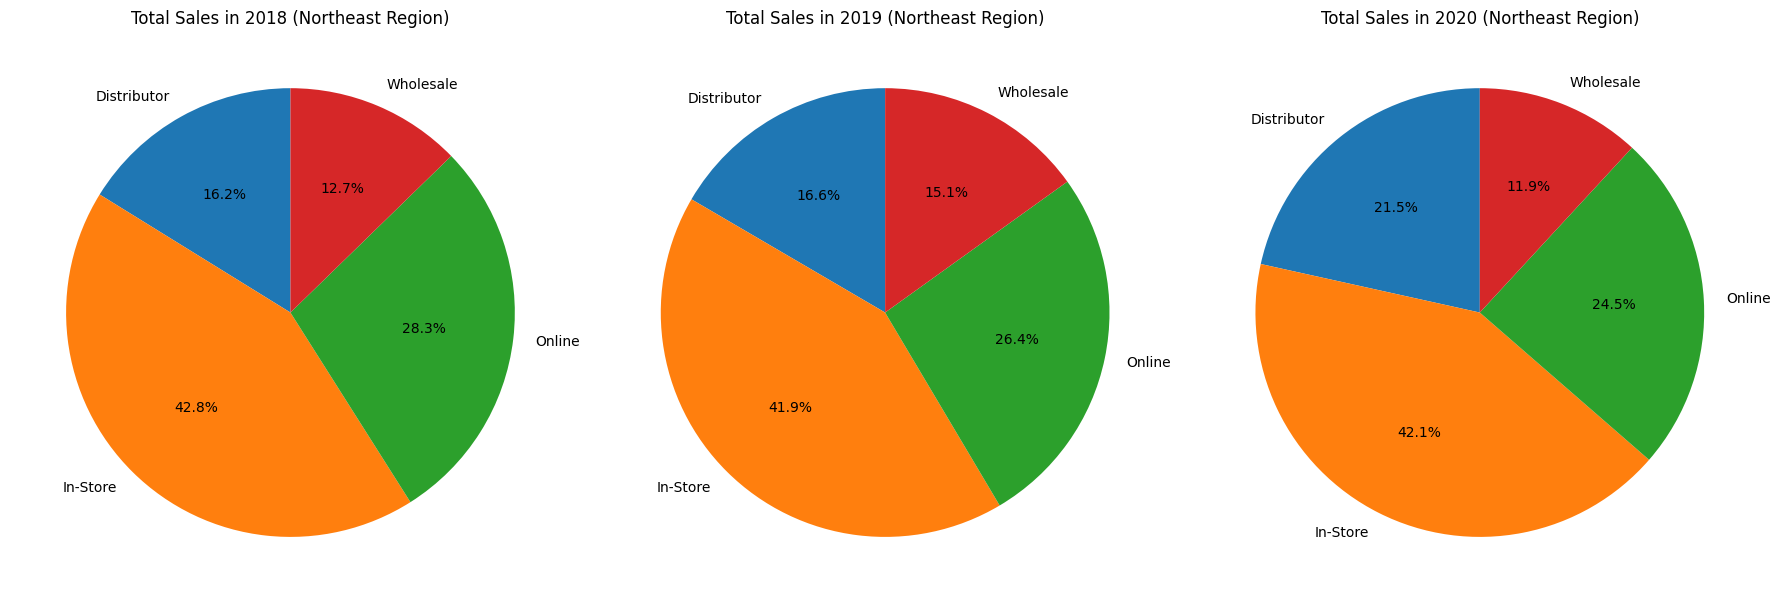

In [148]:
import matplotlib.pyplot as plt

# Filter data for the Northeast region for each year
data_2018 = yearly_sales[(yearly_sales["OrderYear"] == 2018) & (yearly_sales["Region_x"] == "Northeast")]
data_2019 = yearly_sales[(yearly_sales["OrderYear"] == 2019) & (yearly_sales["Region_x"] == "Northeast")]
data_2020 = yearly_sales[(yearly_sales["OrderYear"] == 2020) & (yearly_sales["Region_x"] == "Northeast")]

# Group by Sales Channel and sum Total Price
sales_2018 = data_2018.groupby("Sales Channel")["Total Price"].sum()
sales_2019 = data_2019.groupby("Sales Channel")["Total Price"].sum()
sales_2020 = data_2020.groupby("Sales Channel")["Total Price"].sum()

# Create pie charts for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie chart for 2018
axes[0].pie(sales_2018, labels=sales_2018.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Sales in 2018 (Northeast Region)')

# Plot pie chart for 2019
axes[1].pie(sales_2019, labels=sales_2019.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Total Sales in 2019 (Northeast Region)')

# Plot pie chart for 2020
axes[2].pie(sales_2020, labels=sales_2020.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Total Sales in 2020 (Northeast Region)')

# Adjust layout
plt.tight_layout()
plt.show()


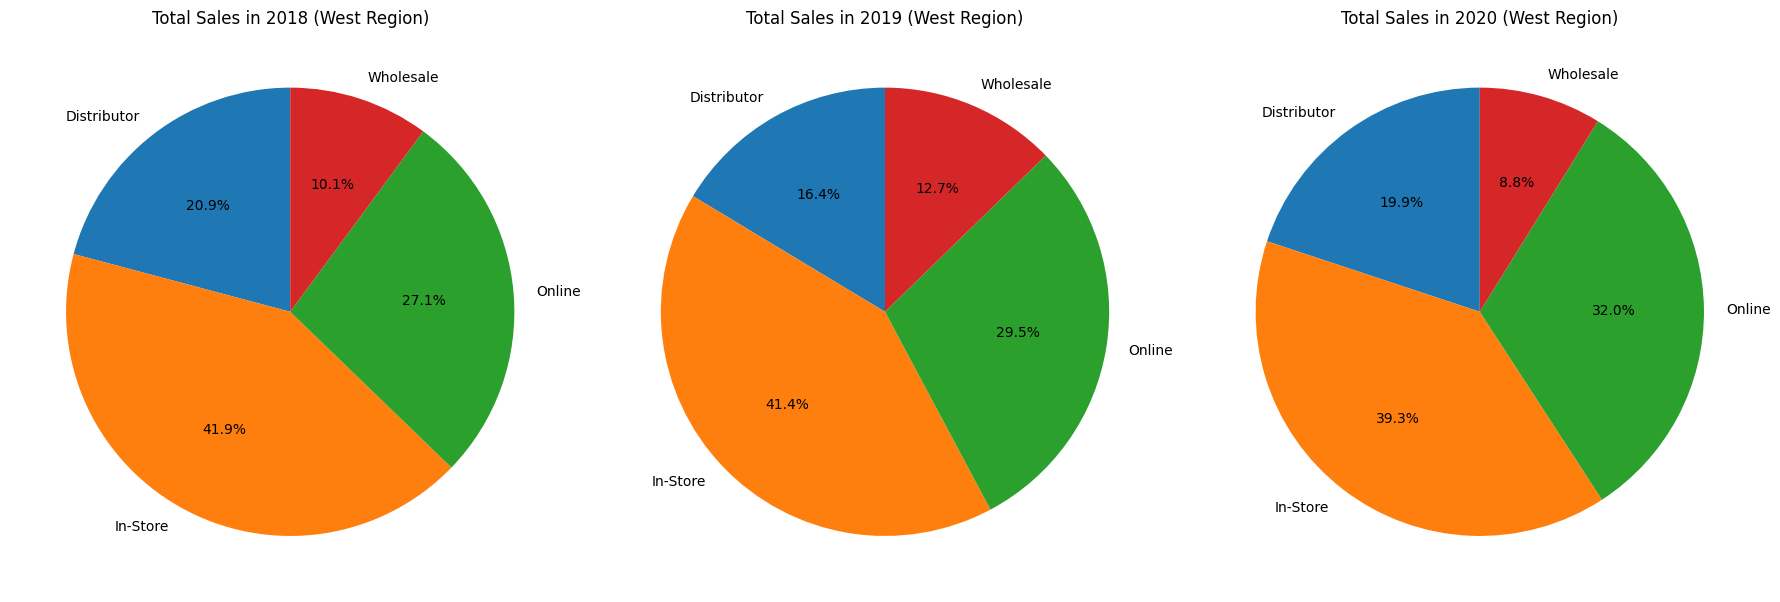

In [149]:
import matplotlib.pyplot as plt

# Filter data for the Northeast region for each year
data_2018 = yearly_sales[(yearly_sales["OrderYear"] == 2018) & (yearly_sales["Region_x"] == "West")]
data_2019 = yearly_sales[(yearly_sales["OrderYear"] == 2019) & (yearly_sales["Region_x"] == "West")]
data_2020 = yearly_sales[(yearly_sales["OrderYear"] == 2020) & (yearly_sales["Region_x"] == "West")]

# Group by Sales Channel and sum Total Price
sales_2018 = data_2018.groupby("Sales Channel")["Total Price"].sum()
sales_2019 = data_2019.groupby("Sales Channel")["Total Price"].sum()
sales_2020 = data_2020.groupby("Sales Channel")["Total Price"].sum()

# Create pie charts for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie chart for 2018
axes[0].pie(sales_2018, labels=sales_2018.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Sales in 2018 (West Region)')

# Plot pie chart for 2019
axes[1].pie(sales_2019, labels=sales_2019.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Total Sales in 2019 (West Region)')

# Plot pie chart for 2020
axes[2].pie(sales_2020, labels=sales_2020.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Total Sales in 2020 (West Region)')

# Adjust layout
plt.tight_layout()
plt.show()

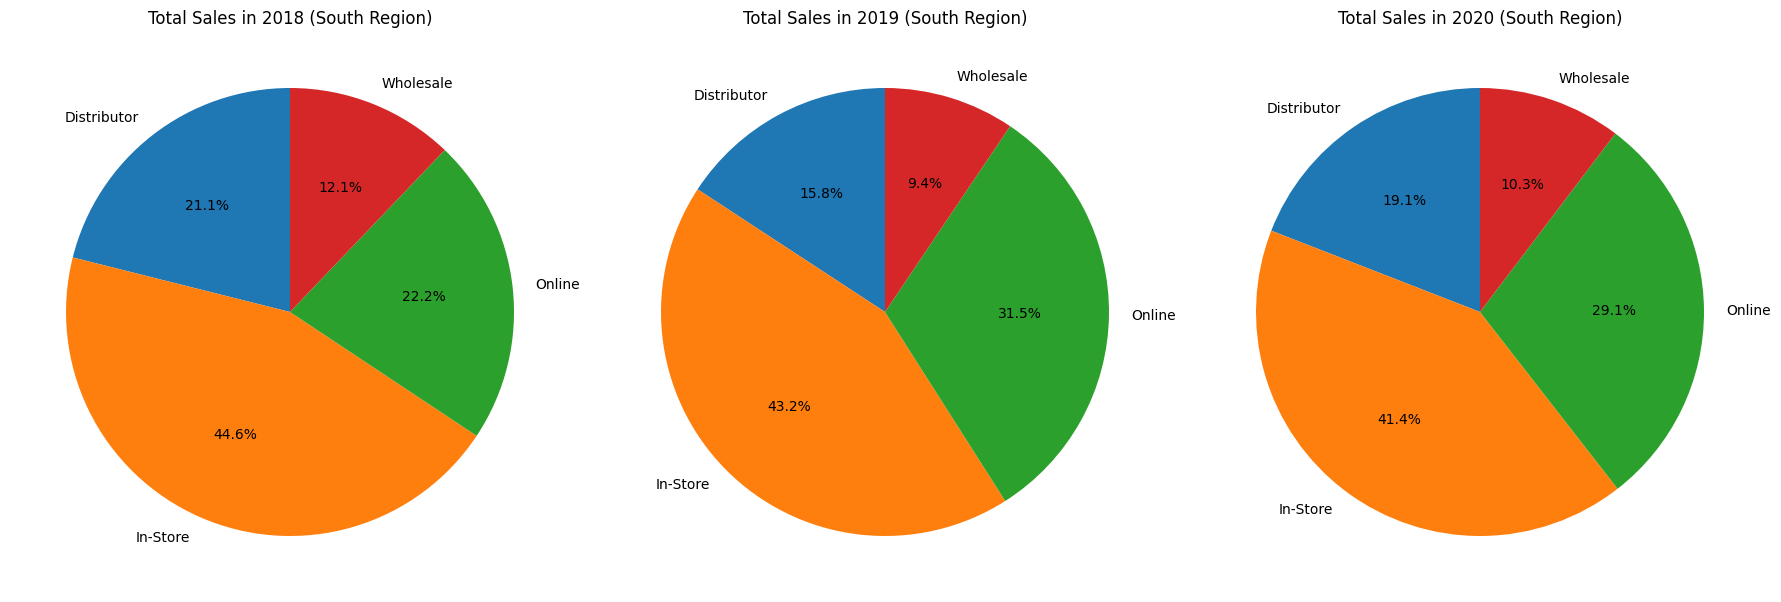

In [150]:
import matplotlib.pyplot as plt

# Filter data for the Northeast region for each year
data_2018 = yearly_sales[(yearly_sales["OrderYear"] == 2018) & (yearly_sales["Region_x"] == "South")]
data_2019 = yearly_sales[(yearly_sales["OrderYear"] == 2019) & (yearly_sales["Region_x"] == "South")]
data_2020 = yearly_sales[(yearly_sales["OrderYear"] == 2020) & (yearly_sales["Region_x"] == "South")]

# Group by Sales Channel and sum Total Price
sales_2018 = data_2018.groupby("Sales Channel")["Total Price"].sum()
sales_2019 = data_2019.groupby("Sales Channel")["Total Price"].sum()
sales_2020 = data_2020.groupby("Sales Channel")["Total Price"].sum()

# Create pie charts for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie chart for 2018
axes[0].pie(sales_2018, labels=sales_2018.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Sales in 2018 (South Region)')

# Plot pie chart for 2019
axes[1].pie(sales_2019, labels=sales_2019.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Total Sales in 2019 (South Region)')

# Plot pie chart for 2020
axes[2].pie(sales_2020, labels=sales_2020.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Total Sales in 2020 (South Region)')

# Adjust layout
plt.tight_layout()
plt.show()

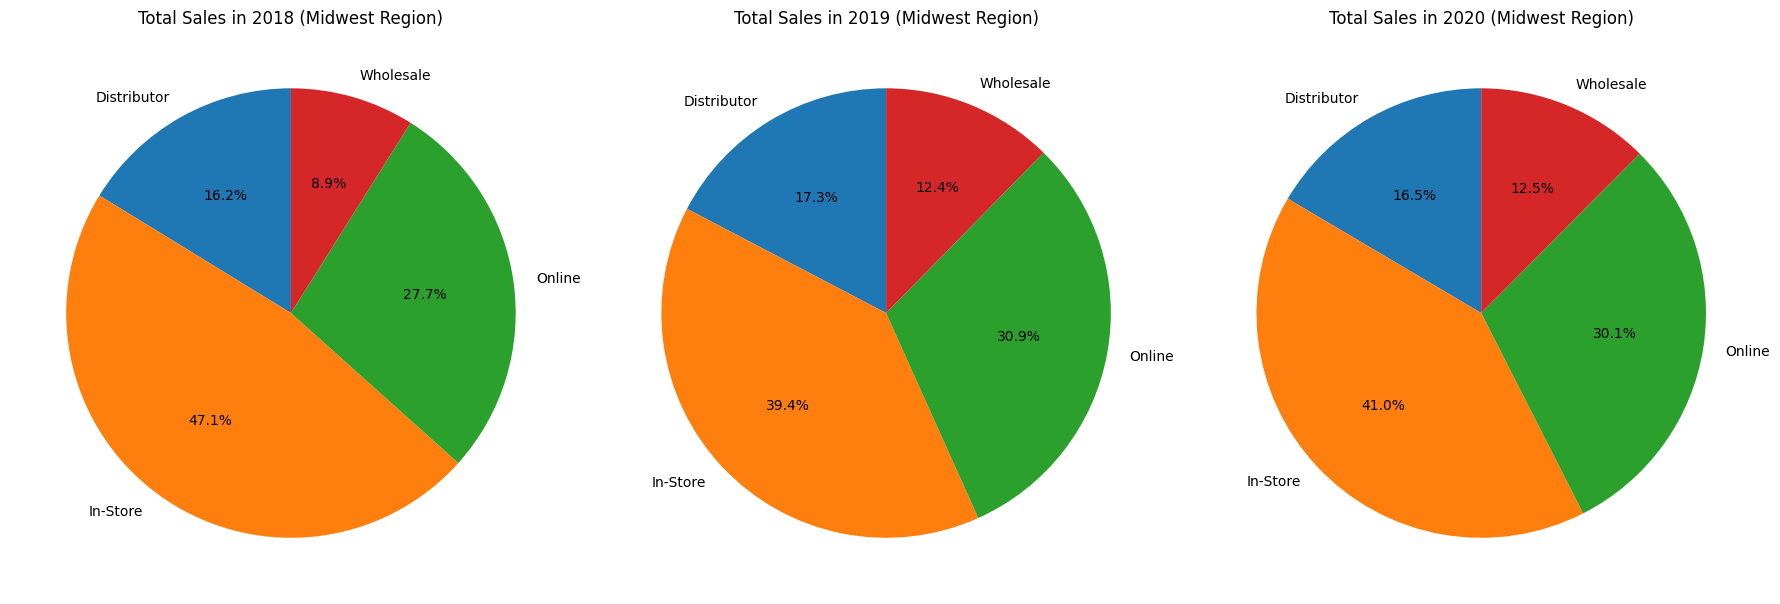

In [151]:
import matplotlib.pyplot as plt

# Filter data for the Northeast region for each year
data_2018 = yearly_sales[(yearly_sales["OrderYear"] == 2018) & (yearly_sales["Region_x"] == "Midwest")]
data_2019 = yearly_sales[(yearly_sales["OrderYear"] == 2019) & (yearly_sales["Region_x"] == "Midwest")]
data_2020 = yearly_sales[(yearly_sales["OrderYear"] == 2020) & (yearly_sales["Region_x"] == "Midwest")]

# Group by Sales Channel and sum Total Price
sales_2018 = data_2018.groupby("Sales Channel")["Total Price"].sum()
sales_2019 = data_2019.groupby("Sales Channel")["Total Price"].sum()
sales_2020 = data_2020.groupby("Sales Channel")["Total Price"].sum()

# Create pie charts for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie chart for 2018
axes[0].pie(sales_2018, labels=sales_2018.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Sales in 2018 (Midwest Region)')

# Plot pie chart for 2019
axes[1].pie(sales_2019, labels=sales_2019.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Total Sales in 2019 (Midwest Region)')

# Plot pie chart for 2020
axes[2].pie(sales_2020, labels=sales_2020.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Total Sales in 2020 (Midwest Region)')

# Adjust layout
plt.tight_layout()
plt.show()

It can be observed that the fluctuation in the year 2019 where the sales were higher was majorly because of an increase in the usage of the Online channel. The trend of usage of the online channel for South and West Region states mimicks the sales in the respective years as well.

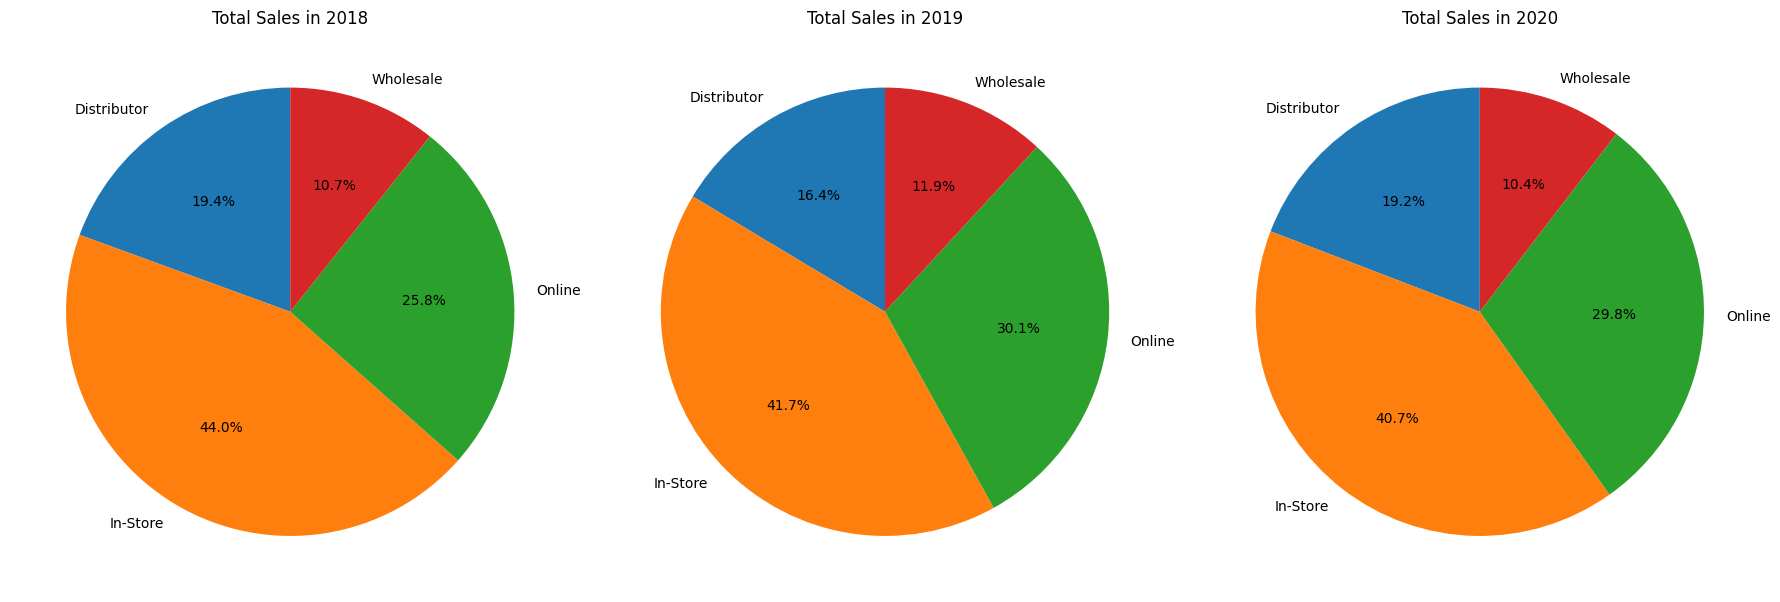

In [152]:
import matplotlib.pyplot as plt

# Filter data for the Northeast region for each year
data_2018 = yearly_sales[(yearly_sales["OrderYear"] == 2018)]
data_2019 = yearly_sales[(yearly_sales["OrderYear"] == 2019)]
data_2020 = yearly_sales[(yearly_sales["OrderYear"] == 2020)]

# Group by Sales Channel and sum Total Price
sales_2018 = data_2018.groupby("Sales Channel")["Total Price"].sum()
sales_2019 = data_2019.groupby("Sales Channel")["Total Price"].sum()
sales_2020 = data_2020.groupby("Sales Channel")["Total Price"].sum()

# Create pie charts for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot pie chart for 2018
axes[0].pie(sales_2018, labels=sales_2018.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Total Sales in 2018')

# Plot pie chart for 2019
axes[1].pie(sales_2019, labels=sales_2019.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Total Sales in 2019')

# Plot pie chart for 2020
axes[2].pie(sales_2020, labels=sales_2020.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Total Sales in 2020')

# Adjust layout
plt.tight_layout()
plt.show()